Import libraries which are necessary

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = "alarms-240222-010325.csv"

Analysis

In [5]:
alarms = pd.read_csv(data,sep=";")

In [19]:
alarms.head(10)

,id,region_id,region_city,all_region,start,end
0,52432,12,Львівська обл.,1,2022-02-24 07:43:17,2022-02-24 09:52:28
1,53292,23,Чернігівська обл.,1,2022-02-24 14:00:43,2022-02-24 17:11:43
2,52080,3,Вінницька обл.,1,2022-02-24 15:40:42,2022-02-24 16:10:42
3,52857,19,Харківська обл.,1,2022-02-24 20:11:47,2022-02-24 20:59:47
4,52700,18,Тернопільська обл.,1,2022-02-25 01:59:36,2022-02-25 09:00:19
5,52081,3,Вінницька обл.,1,2022-02-25 04:01:42,2022-02-25 08:35:42
6,52858,19,Харківська обл.,1,2022-02-25 04:56:47,2022-02-25 05:40:47
7,53293,23,Чернігівська обл.,1,2022-02-25 06:46:43,2022-02-25 06:52:43
8,52431,12,Львівська обл.,1,2022-02-25 06:53:17,2022-02-25 07:56:28
9,72852,9,Київ,0,2022-02-25 07:19:04,2022-02-25 07:49:04


In [20]:
alarms.tail(10)

,id,region_id,region_city,all_region,start,end
55778,158645,15,Полтавська обл.,1,2025-03-01 20:06:26,2025-03-02 01:40:15
55779,158663,20,Херсонська обл.,1,2025-03-01 20:15:17,2025-03-01 23:44:05
55780,158640,13,Миколаївська обл.,1,2025-03-01 20:15:31,2025-03-02 00:55:15
55781,158638,10,Кіровоградська обл.,1,2025-03-01 20:56:32,2025-03-02 01:37:46
55782,158665,23,Чернігівська обл.,1,2025-03-01 21:09:11,2025-03-02 00:59:20
55783,158642,14,Одеська обл.,1,2025-03-01 21:49:30,2025-03-01 23:24:45
55784,158635,9,Київська обл.,1,2025-03-01 22:20:51,2025-03-02 01:38:57
55785,158636,9,Київ,0,2025-03-01 22:52:10,2025-03-02 00:55:18
55786,158617,3,Вінницька обл.,1,2025-03-01 23:26:07,2025-03-02 02:44:07
55787,158629,6,Житомирська обл.,1,2025-03-01 23:26:07,2025-03-02 02:43:26


In [7]:
alarms.describe()

,id,region_id,all_region
count,55788.000000,55788.000000,55788.000000
mean,109103.029935,12.178121,0.972180
std,38574.559928,6.474089,0.164457
min,1.000000,1.000000,0.000000
25%,68259.750000,6.000000,1.000000
50%,126918.500000,13.000000,1.000000
75%,143399.250000,19.000000,1.000000
max,158665.000000,25.000000,1.000000


In [8]:
alarms.shape

(55788, 6)

In [9]:
alarms.dtypes

id              int64
region_id       int64
region_city    object
all_region      int64
start          object
end            object
dtype: object

In [11]:
alarms.start.min()

'2022-02-24 07:43:17'

In [12]:
alarms.start.max()

'2025-03-01 23:26:07'

In [13]:
alarms.columns

Index(['id', 'region_id', 'region_city', 'all_region', 'start', 'end'], dtype='object')

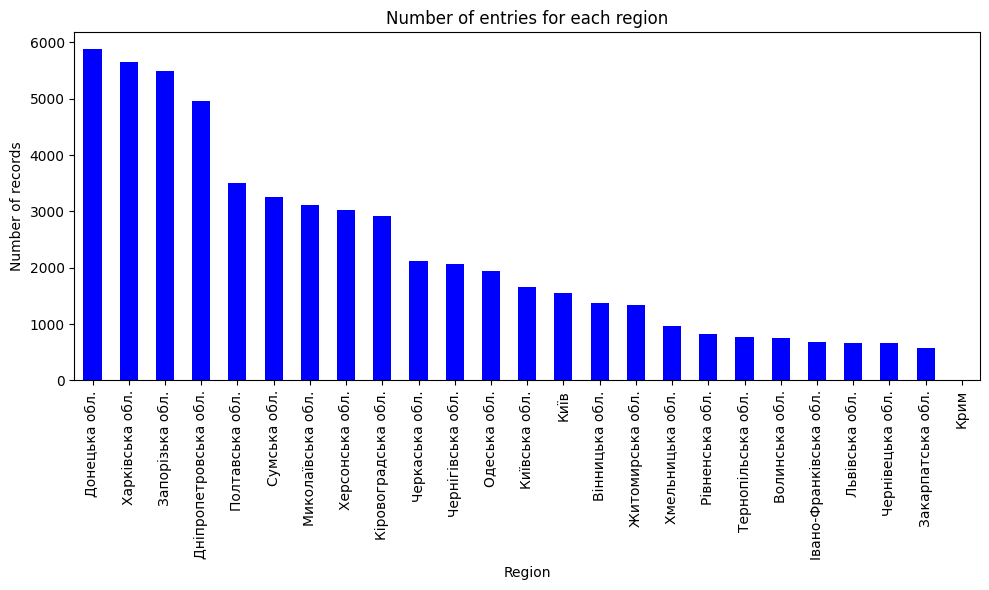

In [21]:
plt.figure(figsize=(10, 6))
alarms['region_city'].value_counts().plot(kind='bar', color='blue')
plt.title('Number of entries for each region')
plt.xlabel('Region')
plt.ylabel('Number of records')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

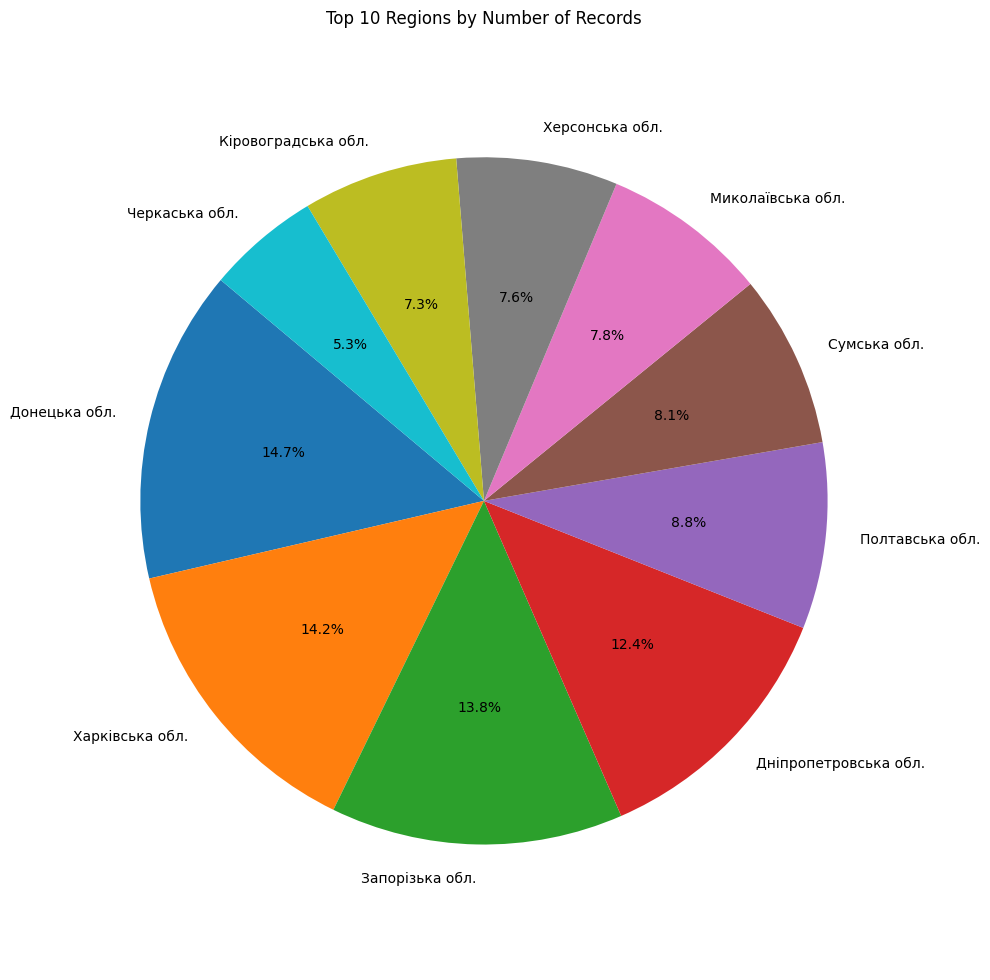

In [23]:
top_10_cities = alarms['region_city'].value_counts().nlargest(10)
plt.figure(figsize=(10, 10))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Regions by Number of Records')
plt.axis('equal') 
plt.tight_layout()
plt.show()


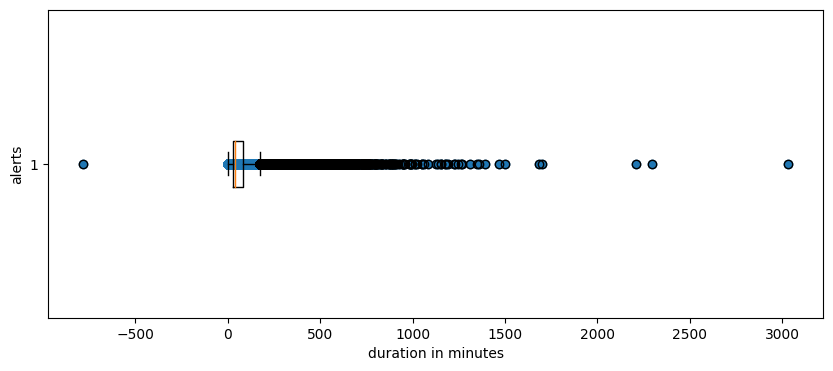

In [26]:
alarms ["start_time"] = pd.to_datetime(alarms["start"])
alarms ["end_time"] = pd.to_datetime(alarms["end"])

alarms ["duration"] = alarms["end_time"] - alarms["start_time"]
alarms["duration_minutes"] = alarms["duration"]/np.timedelta64(1,'m')
alarms["x_1"] = 1
fig = plt.figure(figsize = (10, 4))

#Create plot
plt.boxplot(alarms["duration_minutes"], vert = False)
plt.ylabel("alerts")
plt.xlabel("duration in minutes")
plt.scatter(alarms["duration_minutes"], alarms["x_1"])

#show plot
plt.show()

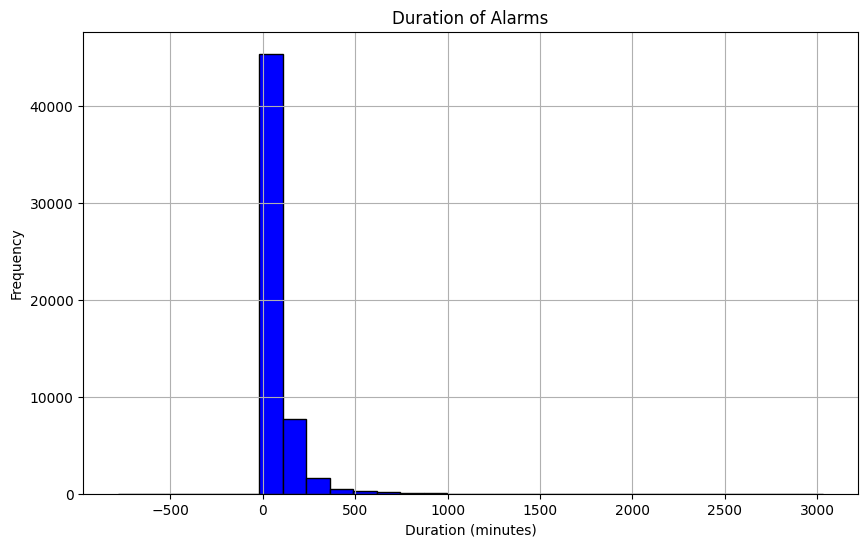

In [24]:
alarms['start'] = pd.to_datetime(alarms['start'])
alarms['end'] = pd.to_datetime(alarms['end'])
alarms['duration'] = alarms['end'] - alarms['start']
plt.figure(figsize=(10, 6))
plt.hist(alarms['duration'].dt.total_seconds() / 60, bins=30, color='blue', edgecolor='black')
plt.title('Duration of Alarms')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Axes: xlabel='duration_minutes'>

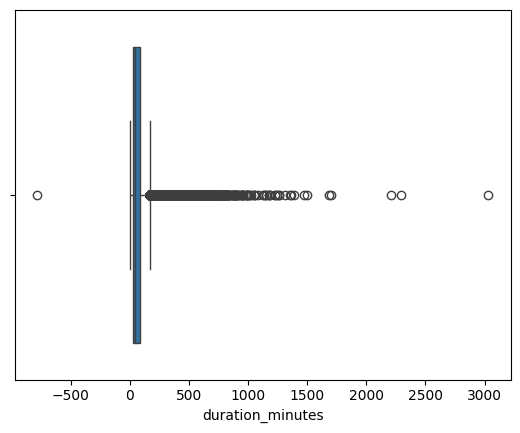

In [28]:
sns.boxplot(x = alarms["duration_minutes"])

<Axes: xlabel='duration_minutes', ylabel='region_city'>

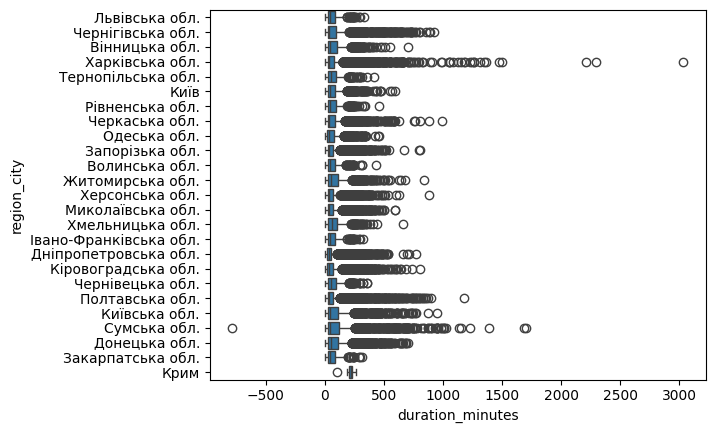

In [30]:

sns.boxplot(data = alarms, x = "duration_minutes", y = "region_city")

In [32]:
alarms["region_city"].value_counts()

region_city
Донецька обл.             5886
Харківська обл.           5652
Запорізька обл.           5494
Дніпропетровська обл.     4966
Полтавська обл.           3499
Сумська обл.              3251
Миколаївська обл.         3123
Херсонська обл.           3031
Кіровоградська обл.       2913
Черкаська обл.            2119
Чернігівська обл.         2074
Одеська обл.              1937
Київська обл.             1654
Київ                      1552
Вінницька обл.            1373
Житомирська обл.          1334
Хмельницька обл.           968
Рівненська обл.            833
Тернопільська обл.         771
Волинська обл.             757
Івано-Франківська обл.     676
Львівська обл.             672
Чернівецька обл.           665
Закарпатська обл.          581
Крим                         7
Name: count, dtype: int64

<Axes: xlabel='all_region'>

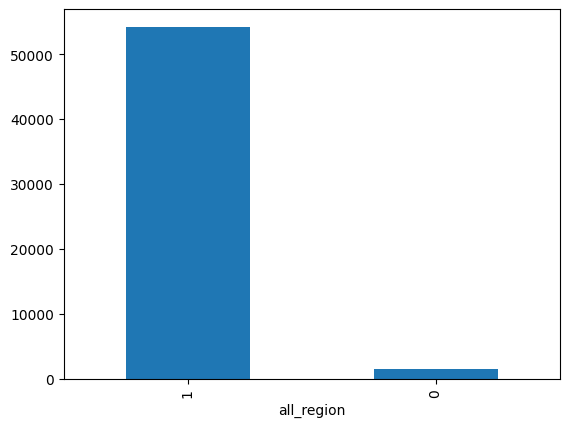

In [33]:
alarms["all_region"].value_counts().plot(kind = 'bar')